In [49]:
"""
Created on Wed Mar 31 14:50:22 2021
@author: suresh021
Description: Assignment-2 of the course "Introduction to Data Science", Spring 2021
"""

'\nCreated on Wed Mar 31 14:50:22 2021\n@author: suresh021\nDescription: Assignment-2 of the course "Introduction to Data Science", Spring 2021\n'

Import required libraries and read given data from csv file

In [50]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler

# read all na as it is
df = pd.read_csv("data/diabetes.csv", keep_default_na = True)

#### Question 1: <br>
Write a python program to calculate mean and max of each column. Then, appropriately handle the missing data <br>
a) remove all the entries with NA, <br>
b) replace all the NA with the mean of the column. <br>
c) calculate mean and max of each column. <br>

In [51]:
# observe some data
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168,43.1,2.288,33,1.0
5,5.0,116.0,74.0,0.0,0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88,31.0,0.248,26,1.0
7,10.0,115.0,0.0,0.0,0,35.3,0.134,29,0.0
8,2.0,197.0,70.0,45.0,543,30.5,0.158,53,1.0
9,8.0,125.0,96.0,0.0,0,0.0,0.232,54,1.0


In [52]:
# calculate mean of all columns
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.695709
BMI                          31.988296
DiabetesPedigreeFunction      0.472208
Age                          33.230169
Outcome                       0.348958
dtype: float64

In [53]:
# calculate max of each column
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [54]:
df.shape

(769, 9)

In [55]:
# remove rows which has null values for all columns
df = df.dropna(how='all')
df.shape

(769, 9)

As you can see, there is no such record which has null value for each column. So, dropna(how='all') didn't remove anything.

In [56]:
# replace NA with mean of that column, inplace = true make changes to the original dataframe variable df
df.fillna(df.mean(), inplace=True)

In [57]:
# calculate mean of all columns after removing nas'
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.695709
BMI                          31.988296
DiabetesPedigreeFunction      0.472208
Age                          33.230169
Outcome                       0.348958
dtype: float64

The mean table shown above is same after replacing NA because each NA is replaced by mean values.

In [58]:
# calculate max of all columns after removing nas'
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

Here, The max table shown above is same after replacing NA by mean because mean is always going to be less than max value, so replacing NA by mean won't chane the max value.

#### Question 2: <br> 
Read the attached dataset and write only the Pregnancies, Glucose and Outcome columns of the dataset to a file called ‘pre_glu_outcome.csv’. Read the table in Panda’s DataFrame and find out the shape and size of the DataFrame. Also, print first 5 rows and last 5 rows. (Onwards, use the dataset with all the entries with NA removed.)

In [59]:
# create new dataframe with Pregnancies, Glucose and Outcome columns only.
df_new = df[["Pregnancies", "Glucose","Outcome"]]

# save new dataframe to csv
df_new.to_csv("data/pre_glu_outcome.csv")

# read previously saved csv with three columns Pregnancies, Glucose and Outcome, make the index column false
# Question is not clear about which table should be read, old one or currently saved? So, I am reading from newly saved csv.
df_PGO = pd.read_csv("data/pre_glu_outcome.csv", index_col = 0)

In [60]:
df_PGO.shape

(769, 3)

Here, Shape of the dataframe is (769, 3). That means there are 769 rows and 3 columns.

In [61]:
# print first five rows
df_PGO.head()

,Pregnancies,Glucose,Outcome
0,6.0,148.0,1.0
1,1.0,85.0,0.0
2,8.0,183.0,1.0
3,1.0,89.0,0.0
4,0.0,137.0,1.0


In [62]:
# print last five rows
df_PGO.tail()

,Pregnancies,Glucose,Outcome
764,10.0,101.0,0.0
765,2.0,122.0,0.0
766,5.0,121.0,0.0
767,1.0,126.0,1.0
768,1.0,93.0,0.0


#### Question 3:
Calculate the max, mean, standard deviation, median, 75 percentile of the Glucose column of the dataset.

In [63]:
# The describe function in pandas gives descriptive statistics of the dataframe
stat = df_PGO["Glucose"].describe()
print(stat)

count    769.000000
mean     120.894531
std       31.951796
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64


If you just want to observe the distribution, the describe() function is enough. If you want to determine specific measure for futrher process,you can just put the result of describe() function into a variables as described below:

Alternatively, we can use pandas min(), max(), std(), median() functions.

In [64]:
mean = stat[1]
max = stat[7]
sd = stat[2]
third_quartile = stat[6]
median = stat[5]
print("Mean = %.2f, Max = %.2f, SD = %.2f, Median = %.2f, 75th Percentile = %.2f" %(mean, max, sd, median, third_quartile))

Mean = 120.89, Max = 199.00, SD = 31.95, Median = 117.00, 75th Percentile = 140.00


#### Question 4:
Display histogram, bargraph of Glucose and Blood pressure column of this data. Also, plot the scatter plot between Glucose and Blood pressure column. Can you decipher and relationship between these two variables based on the scatter plot.

Text(0.5, 1.0, 'Histogram for BloodPressure arrtibute')

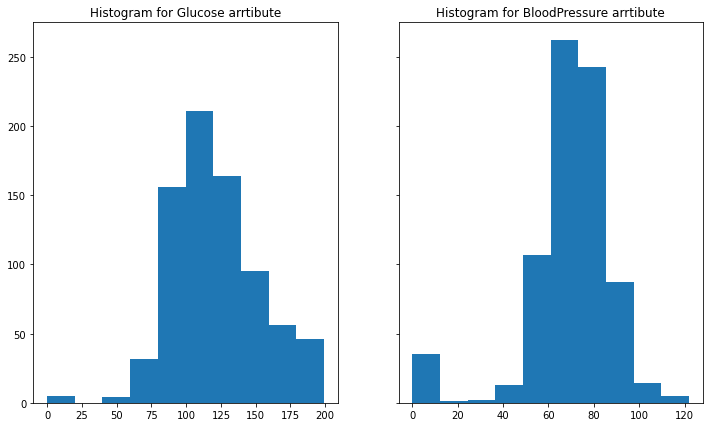

In [65]:
fig, ax = plt.pyplot.subplots(1, 2, sharex='col', sharey='row', figsize=(12,7))
ax[0].hist(df.Glucose)
ax[0].set_title("Histogram for Glucose arrtibute")
ax[1].hist(df.BloodPressure)
ax[1].set_title("Histogram for BloodPressure arrtibute")


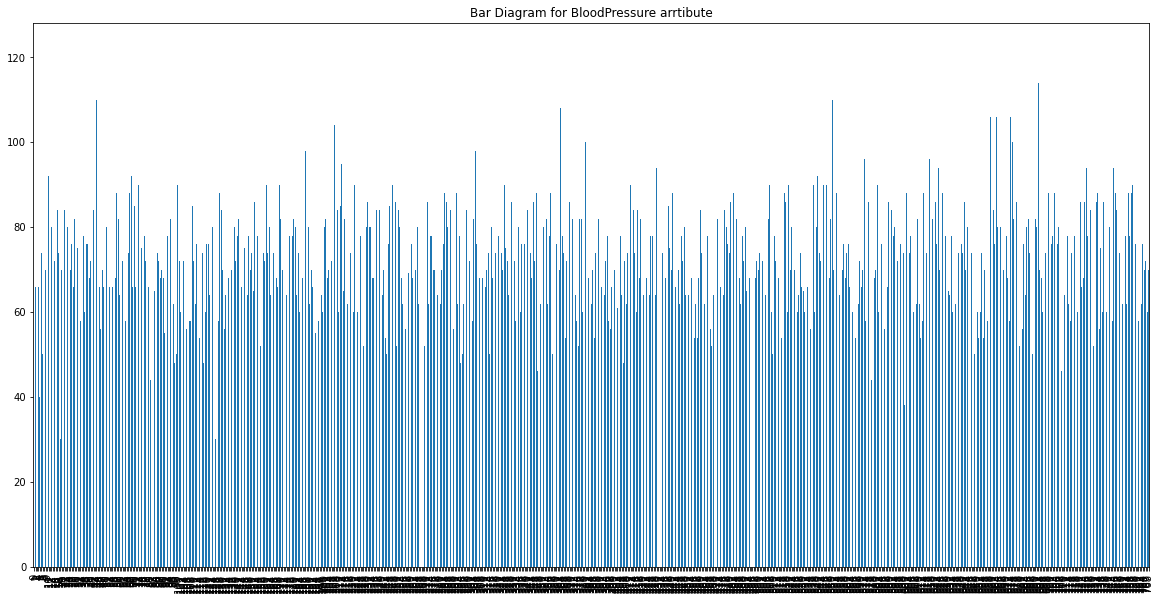

In [66]:
df.BloodPressure.plot(kind='bar',title='Bar Diagram for BloodPressure arrtibute',figsize=(20,10))

The x-axis labels are overlapped because there are too many distinct points which couldn't fit in the specified area.

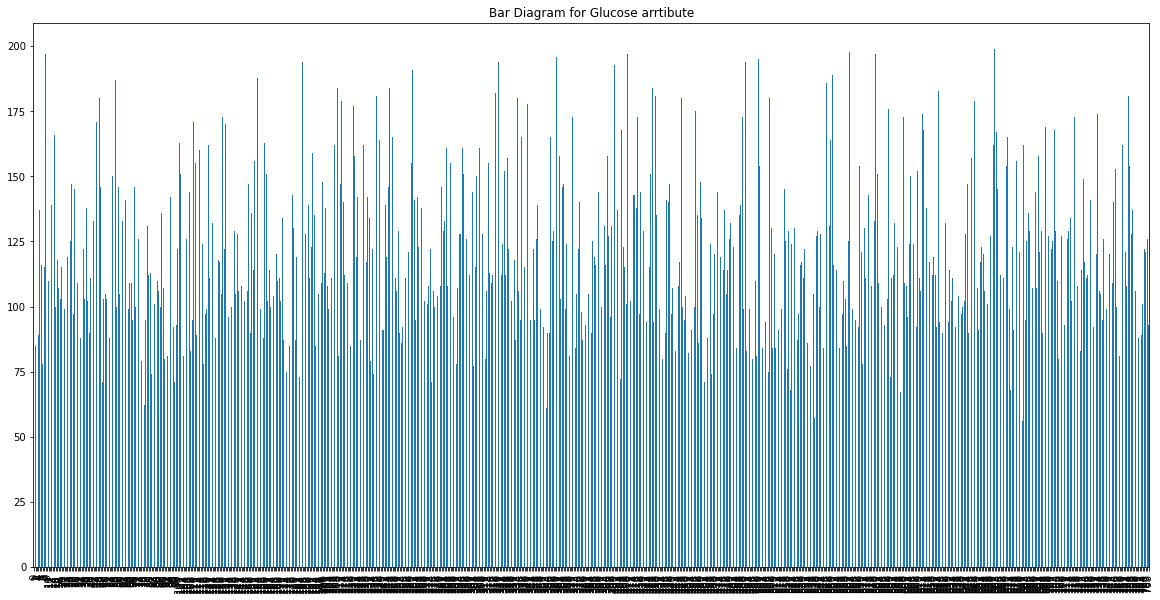

In [67]:
df.Glucose.plot(kind='bar',title='Bar Diagram for Glucose arrtibute', figsize=(20,10))

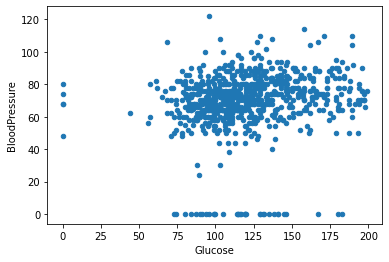

In [68]:
# scatter plot
df.plot.scatter('Glucose', 'BloodPressure')

Explanation: From observing the scatter plot between Glucose and BloodPressure variables, we can infer that having high Glucose is directly proportional to the Blood pressure. In most of the cases, the people having high blood pressure also has high Glucose value.

So, it can be inferred that these two features: Glucose and BloodPressure are positively correlated.

#### Question 5:
Plot the boxplot of each attributes (columns etc. the last column) and Perform minmax-scaling of the attached data and plot the boxplot after the scaling. You are only going to do it for the features not the labels (last column: outcome).

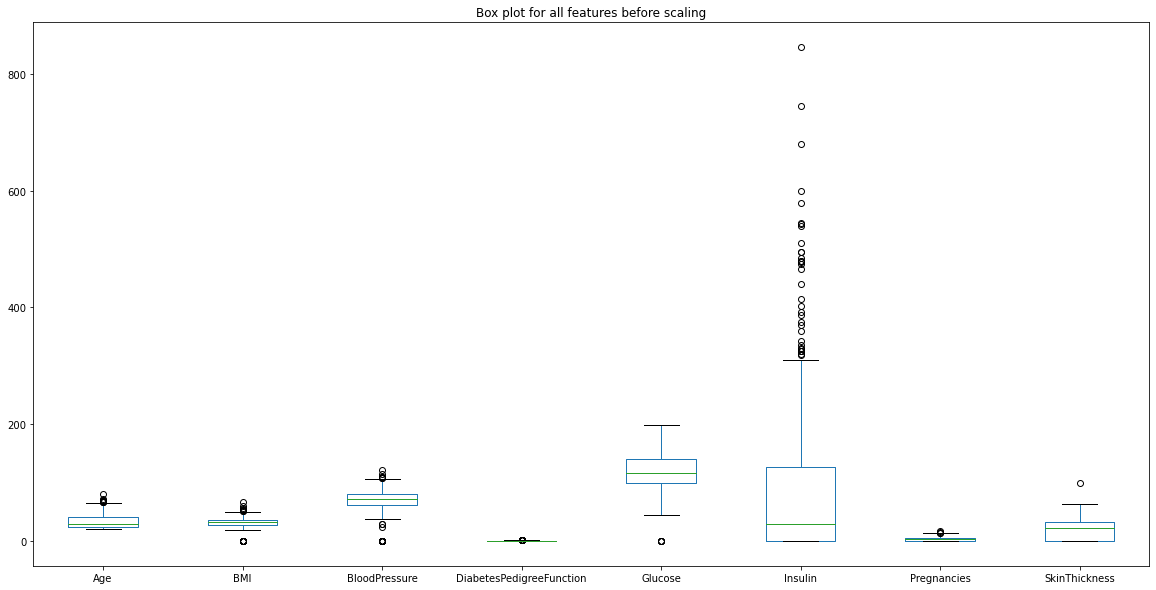

In [69]:
# plot the box plot except the outcome column
df[df.columns.difference(['Outcome'])].plot(kind='box',title='Box plot for all features before scaling',figsize=(20,10))

Here, we see the box plot more complicated to visualize because these attributes have different scale. Currently, all the features are unscaled. So, we are going to perform MinMax Scaling that bounds each features in between [0,1]. Then, we will draw the box plot again to observe the changes.

In [73]:
# define the scaler as MinMaxScaler from sklearn
scaler = MinMaxScaler()

# apply scaler to each column except output column.
# outcome is already in binary form, there is no effect of performing minmax scaling to this column

scaler.fit(df[['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']])
df[['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']] = scaler.transform(df[['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']])

In [74]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


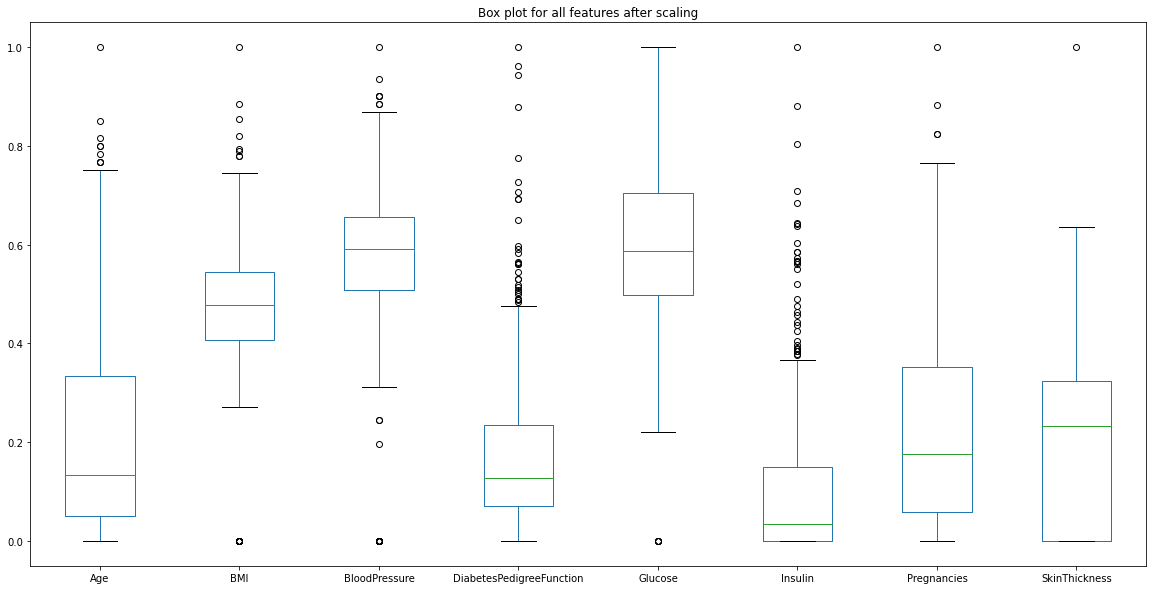

In [75]:
# Boxplot after minmaxscaling
df[df.columns.difference(['Outcome'])].plot(kind='box',title='Box plot for all features after scaling', figsize=(20,10))

Here, we can observe that the scale of the attributes are changed into same range [0,1] As we have seen, minmax scaling is feature pre-processing tool that maps every feature in between 0 and 1. The output is called scaled features. Also, It is more comfortable and organized to observe the distribution because they are in same scale now.

<center><b>***</b></center>